In [1]:
import os

from IPython.core.pylabtools import figsize

import veeringCV

from importlib import reload
reload(veeringCV)

<module 'veeringCV' from '/Users/sean/PycharmProjects/stripeFieldGUI/veeringCV.py'>

In [2]:
importDirectory = '/Users/sean/mbp_storage/251017/portMain'
importPath = os.path.join(importDirectory,'Port Main'+'.h5')

In [3]:
## Load H5 File
normalisations = [1,3]
features = veeringCV.VeeringNormalisation(importPath)
features.RunNormalisation(normalisations)

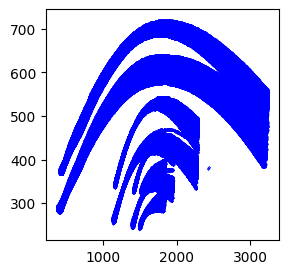

In [4]:
## Generate Pixcels
targetColour = [256,165,130]
searchRange = [175,205,5]

thresholds = veeringCV.Thresholding(features.pixcels,targetColour,searchRange)
thresholds.Run_Thresholding()
thresholds.Generate_Stripe_Pixcels(int(0),features.pixcels,features.origShape)
thresholds.Count_Filter(float(0.1),float(0.9))
thresholds.Stripes_Plot_Clean()


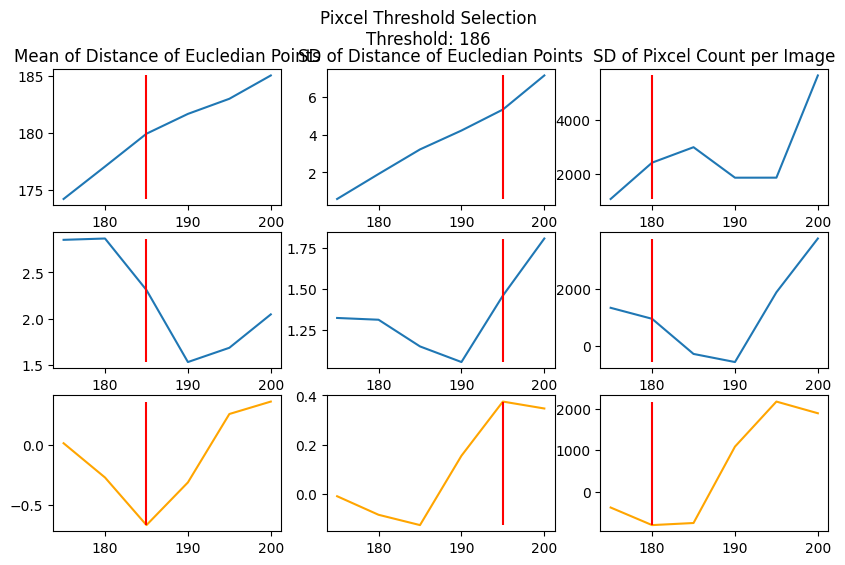

In [5]:
## Thresholds Graph
thresholds.Threshold_Graphs()


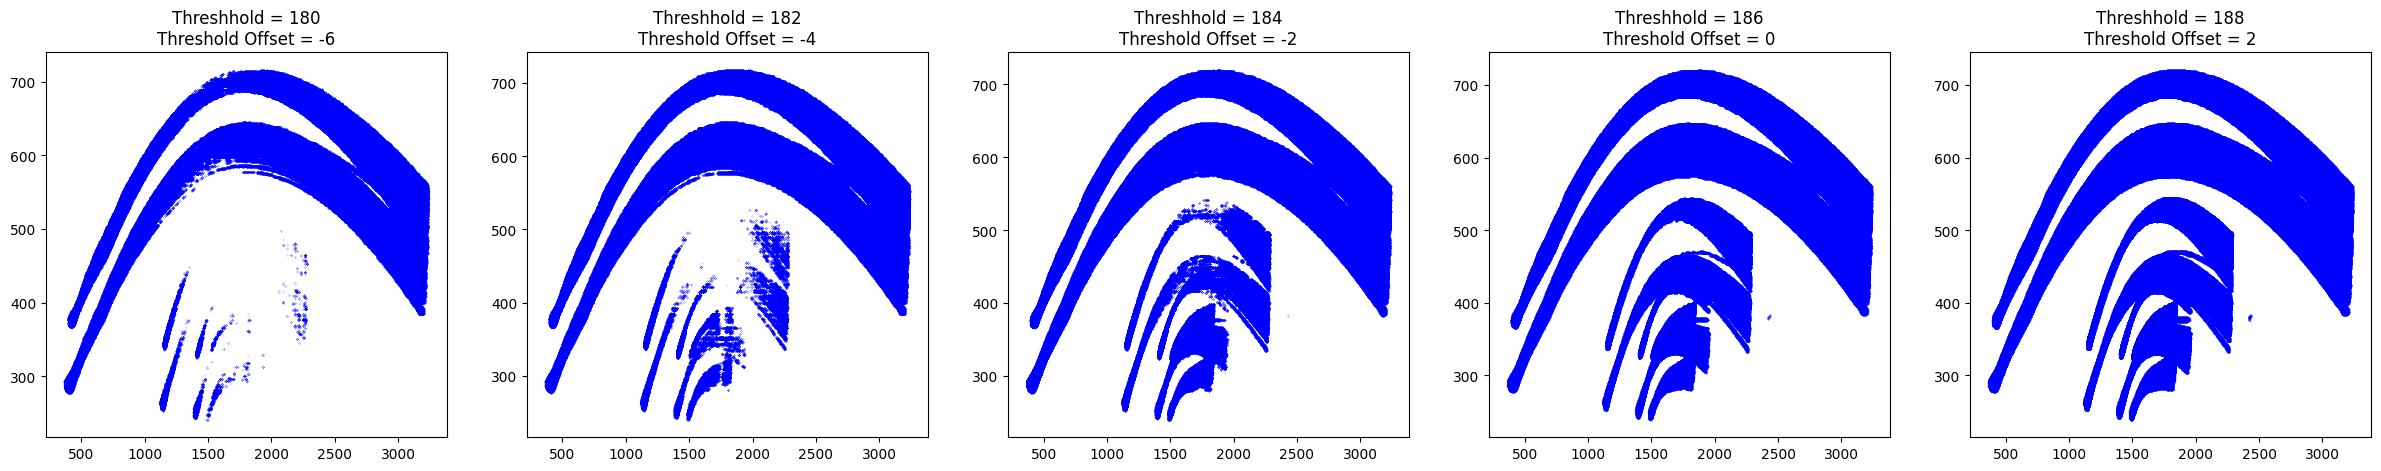

In [6]:
## Offset Sweep
thresholds.Threshold_Sweep_Graphs([-6,-4,-2,0,2], features.origShape, features.pixcels)

In [7]:
thresholds.Generate_Stripe_Pixcels(4,features.pixcels,features.origShape)

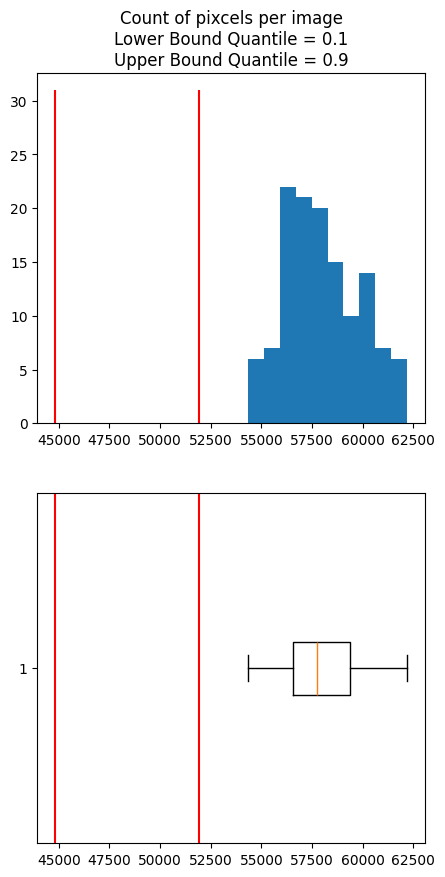

In [8]:
## Count Cleaning Graphs
thresholds.Cnt_Filter_Plot()

In [9]:
multipliers = [0.005, 0.001]
countFilter_ind = thresholds.countFilter_ind
clusterOffset = 0
set_db = veeringCV.Set_DB(thresholds.stripes, multipliers, countFilter_ind, clusterOffset)

In [10]:
set_db.Set_PCA_DB()

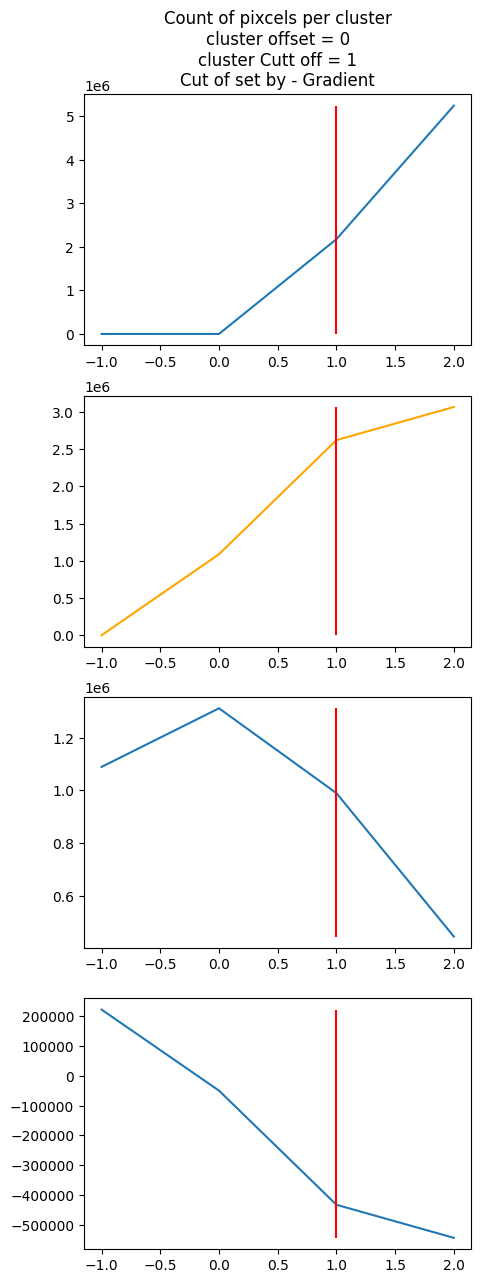

In [11]:
set_db.Cluster_Filter_FIG()

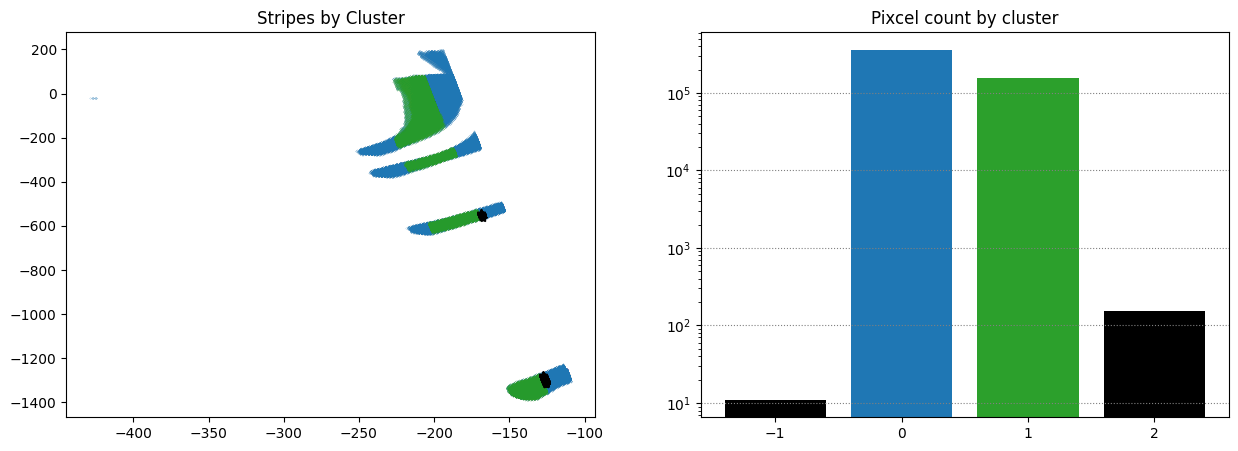

In [12]:
set_db.Cluster_Plot_FIG()

In [13]:
stripes, setPCA = set_db.Make_DB_Scan_Set()

In [14]:
pic_db = veeringCV.Pic_DB(stripes,set_db.setRotation_degrees, setPCA)

In [15]:
pic_db.Pic_DB_Scan(False,25,0.01,.0001)

In [16]:
cp_dict = pic_db.clusterPoints_dict

In [17]:
fit_calc = veeringCV.Fit_Spline_Calc(cp_dict, features.origShape, setPCA)
fit_calc.Fit_Splines(False, 0.1, 5, 0.1)
fit_calc.Link_Splines(False, 75, 1.25, 4)
fit_calc.Filter_Splines(4)
fit_calc.Calc_Properties()

n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 

In [18]:
picture = veeringCV.VeeringNormalisation(importPath)
picture.RunNormalisation([0])
export_class = veeringCV.Export_Results(picture, features.timestamps,importPath)
export_class.Export_Images(fit_calc.splines_set_final, fit_calc.stripe_properties, ['.pdf', '.jpg'])
export_class.Export_Data_CSV(fit_calc.stripe_properties,4)

<Figure size 640x480 with 0 Axes>